# Homework 1, P1:
### The below code imports the acm dataset, parses, cleans and preprosses it according to the defined rules and stores it in appropriate data structures for use in subsequest questions.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

distinct_pub = []
distinct_references = []

distinct_author = set()
distinct_pub_venue = set()

author_pub_map = dict()
venue_pub_map = dict()
pub_citation_map = dict()
venue_citation_map = dict()
pub_index_map = dict()
venue_index_map = dict()
venue_ref_map = dict()
year_pub_map = dict()
year_refs_map = dict()
year_citation_map = dict()
pub_reference_map = dict()
ind = 0

# with open("aminer_subset.txt") as file:
with open("./acm.txt") as file:
    publication = ""
    year = ""
    pub_venue = ""
    paper_refs = []
    while True:
        line = file.readline()
        if not line:
            break
        else:
            if line.startswith("#*"):
                publication = line[2:].strip()
                distinct_pub.append(publication)

            elif line.startswith("#c"):
                pub_venue = line[2:].strip()
                distinct_pub_venue.add(pub_venue)

            elif line.startswith("#%"): #paper references
                ref = line[2:].strip()
                paper_refs.append(ref)

            elif line.startswith("#t"):
                year = line[2:].strip()
                if year != "":
                  if year not in year_pub_map:
                    year_pub_map[year] = set()
                  year_pub_map[year].add(publication)

            elif line.startswith("#index"):
                indexId = line[6:].strip()
                pub_index_map[indexId] = publication
                # if pub_venue:
                #     venue_index_map[indexId] = pub_venue

            elif line.startswith("#@"):
                authorsStr = line[2:]
                authorsStr = authorsStr.replace(" Jr.,", "Jr.")
                authors_list = authorsStr.strip().split(",")
                for author in authors_list:
                    author_trimmed = author.strip()
                    if author_trimmed != "-" and author_trimmed != "Jr."\
                            and author_trimmed != "III":
                        if author_trimmed not in author_pub_map:
                            author_pub_map[author_trimmed] = set()
                        # pub_hash = publication + ":" + year + ":" + pub_venue;
                        author_pub_map[author_trimmed].add(publication)

                    distinct_author.add(author_trimmed)

            if len(paper_refs) > 0 and not line.startswith("#%"):
                distinct_references.extend(paper_refs)
                # pub_hash = publication + ":" + year + ":" + pub_venue;
                pub_reference_map[publication] = len(paper_refs) #change to pub_reference_map

                for pub_ind in paper_refs:
                    publication_name = pub_index_map.get(pub_ind)
                    if publication_name and publication_name.strip() != "":
                        if publication_name not in pub_citation_map:
                            pub_citation_map[publication_name] = 0
                        pub_citation_map[publication_name] += 1
                        
                if pub_venue != '':
                  if pub_venue not in venue_ref_map:
                    venue_ref_map[pub_venue] = 0
                  venue_ref_map[pub_venue] += len(paper_refs)

                if year != '':
                  if year not in year_refs_map:
                    year_refs_map[year] = 0
                  year_refs_map[year] += len(paper_refs)

                paper_refs.clear()



            if line == "\n" and line.strip() == '':
                publication = ""
                year = ""
                pub_venue = ""
                ind = ind+1

            if pub_venue == "Principles and Practice of Knowledge Discovery in Databases":
                print("paper details for the publication venue: Principles and Practice of Knowledge Discovery in Databases")
                print("publication: " + publication)
                print("year: " + year)

            if pub_venue != "":
              if pub_venue not in venue_pub_map:
                  venue_pub_map[pub_venue] = set()
              # pub_hash = publication + ":" + year + ":" + pub_venue
              venue_pub_map[pub_venue].add(publication)


In [4]:
for venue in venue_pub_map:
    venue_citation_map[venue] = 0
    for pub in venue_pub_map.get(venue):
        pub_citations = pub_citation_map.get(pub)
        if pub_citations:
            # print(pub, " : ", pub_citations)
            venue_citation_map[venue] += pub_citations

for year in year_pub_map:
    citation_per_year = 0
    for pub in year_pub_map.get(year):
        pub_citations = pub_citation_map.get(pub)
        if pub_citations:
            citation_per_year += pub_citations
    year_citation_map[year] = citation_per_year

#### P1.a: Compute the number of distinct authors, publication venues, publications, and citations/references

In [5]:
print("distinct authors = " + str(len(distinct_author)))
print("distinct publication venue = " + str(len(distinct_pub_venue)))
print("distinct publications = " + str(len(distinct_pub))) #2385057
print("distinct references/citations = " + str(len(distinct_references)))
print("index = " + str(ind))

distinct authors = 1653755
distinct publication venue = 273329
distinct publications = 2385022
distinct references/citations = 9671893
index = 2385066


#### P1.b: Are these numbers likely to be accurate? As an example look up all the publications venue names associated with the conference “Principles and Practice of Knowledge Discovery in Databases” – what do you notice?

In [6]:
searchTerm = "Principles and Practice of Knowledge Discovery in Databases"
for key in venue_pub_map:
    for publication in venue_pub_map[key]:
        if publication == searchTerm or searchTerm in publication:
            print("Venue name: ", key)
            print("Publication name: ", publication)

Venue name:  PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases
Publication name:  Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases
Venue name:  Knowledge Discovery in Databases: PKDD 2006: 10th European Conference on Principles and Practice of Knowledge Discovery in Databases, Berlin, Germany, September ... (Lecture Notes in Computer Science)
Publication name:  Knowledge Discovery in Databases: PKDD 2006: 10th European Conference on Principles and Practice of Knowledge Discovery in Databases, Berlin, Germany, September ... (Lecture Notes in Computer Science)
Venue name:  Knowledge Discovery in Databases: PKDD 2005: 9th European Conference on Principles and Practice of Knowledge Discovery in Databases, Porto, Portugal, October ... / Lecture Notes in Artificial Intelligence)
Publication name:  Knowledge Discovery in Databases: PKDD 2005: 9th European Conference on Pri

##### Observation from the above problem: 
##### There are no venues with exact name, "Principles and Practice of Knowledge Discovery in Databases". However multiple records contain the substring, "Principles and Practice of Knowledge Discovery in Databases". For such records, the publication either also contained the substring "Principles and Practice of Knowledge Discovery in Databases" or the publication name was exactly same as the venue name. This shows that there are anamolies and inaccuracies in the data.

#### P1.c: For each author, construct the list of publications. Plot a histogram of the number of publications per author (use a logarithmic scale on the y axis)

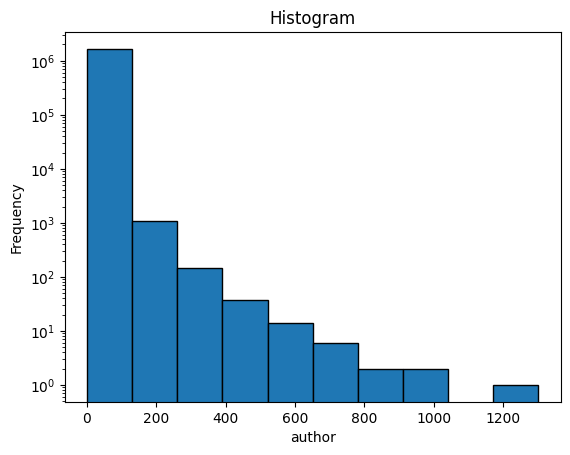

In [7]:
author_publications = []

for key in author_pub_map:
    freq = len(author_pub_map.get(key))
    author_publications.append(freq)

plt.hist(author_publications, edgecolor='black')
# Customize the plot
plt.yscale('log')

plt.xlabel('author')
plt.ylabel('Frequency')
plt.title('Histogram')

plt.show()

#### P1.d: Calculate the mean and standard deviation of the number of publications per author. Also calculate the Q1 (1st quartile14), Q2 (2nd quartile, or median) and Q3 (3rd quartile) values. Compare the median to the mean and explain the difference between the two values based on the standard deviation and the 1st and 3rd quartiles.

In [8]:
print("Mean: ", (np.mean(author_publications)))
print("Median: ", (np.median(author_publications)))
print("Std: ", (np.std(author_publications)))
print("Q1: ", (np.percentile(author_publications, 25)))
print("Q2: ", (np.percentile(author_publications, 50)))
print("Q3: ", (np.percentile(author_publications, 75)))

Mean:  3.363496461379941
Median:  1.0
Std:  9.516617161938882
Q1:  1.0
Q2:  1.0
Q3:  2.0


#### P1.e: Now plot a histogram of the number of publications per venue

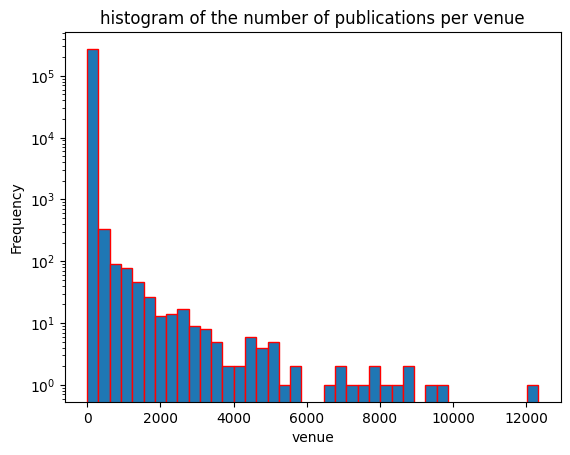

In [9]:
pub_citations = []
for key in venue_pub_map:
    freq = len(venue_pub_map.get(key))
    pub_citations.append(freq)

plt.hist(pub_citations, bins=40, log=True, edgecolor='red')

plt.xlabel('venue')
plt.ylabel('Frequency')
plt.title('histogram of the number of publications per venue')

plt.show()

#### Calculate the mean, standard deviation, median, Q1, and Q3 values.

In [10]:
print("Mean: ", (np.mean(pub_citations)))
print("Std: ", (np.std(pub_citations)))
print("Q1: ", (np.percentile(pub_citations, 25)))
print("Q2: ", (np.percentile(pub_citations, 50)))
print("Q3: ", (np.percentile(pub_citations, 75)))


Mean:  8.195888471402595
Std:  94.03058063781651
Q1:  1.0
Q2:  1.0
Q3:  1.0


#### What is the venue with the largest number of publications in the dataset?

In [11]:
venue_with_max_pubs = ""
max_pubs = 0

for key in venue_pub_map.keys():
    no_pubs = len(venue_pub_map.get(key))
    if no_pubs > max_pubs:
        max_pubs = no_pubs
        venue_with_max_pubs = key

print("Venue with max publications: "+ venue_with_max_pubs)

Venue with max publications: IEEE Transactions on Information Theory


#### P1.f Plot a histogram of the number of references (number of publications a publication refers to)

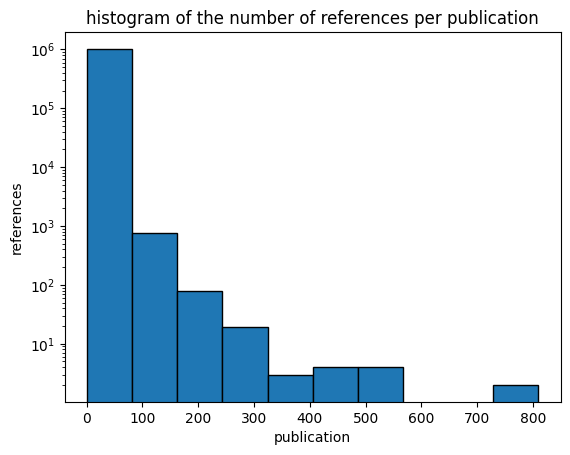

In [12]:
plt.hist(pub_reference_map.values(), edgecolor='black')
plt.yscale('log')

plt.xlabel('publication')
plt.ylabel('references')
plt.title('histogram of the number of references per publication')

plt.show()

#### P1.f Plot a histogram of the number of citations (number of publications referring to a publication) per publication.

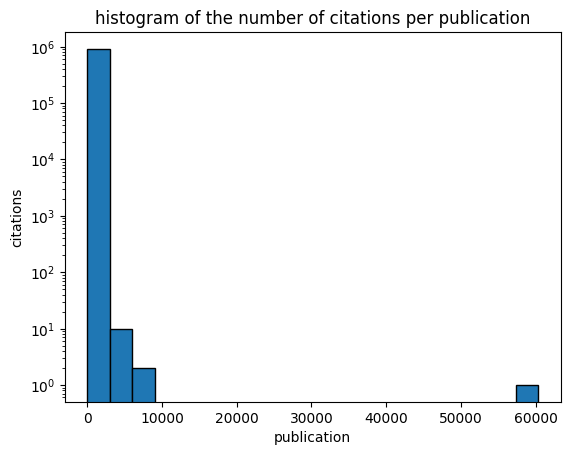

In [13]:
plt.hist(pub_citation_map.values(), bins=20, edgecolor='black')
plt.yscale('log')

plt.xlabel('publication')
plt.ylabel('citations')
plt.title('histogram of the number of citations per publication')

plt.show()

#### What is the publication with the largest number of references?

In [14]:
pub_with_max_refs = ""
max_citations = 0

for key in pub_reference_map.keys():
    num_references = pub_reference_map.get(key)
    if num_references > max_citations:
        max_citations = num_references
        pub_with_max_refs = key

print("Publication with max references: "+ pub_with_max_refs)

Publication with max references: Proceedings of the Twenty-Fourth ACM Symposium on Operating Systems Principles


#### What is the publication with the largest number of citation?

In [15]:
pub_with_max_citation = ""
max_citations = 0

for key in pub_citation_map:
    num_citation = pub_citation_map.get(key)
    if num_citation > max_citations:
        max_citations = num_citation
        pub_with_max_citation = key

print("Publication with max citation: "+ pub_with_max_citation, ", num citations: ", max_citations)

Publication with max citation: Evaluating Design Alternatives for Feature Recommendations in Configuration Systems , num citations:  60315


Its odd that one journal has so many citations. Also, from the histogram, it looks like the data is skewed. I also observed that there are multiple records with the same publication name, "INFORMS Journal on Computing" which further corroborates the inaccuracy of the data and this result.

#### P1.g Calculate the so called “impact” factor for each venue. To do so, calculate the total number of citations for the publications in the venue, and then divide this number by the number of publications for the venue. Plot a histogram of the results

In [16]:



venue_impact_factor = dict()
for key in venue_citation_map.keys():
  num_citations = int(venue_citation_map.get(key))
  num_pub = len(venue_pub_map.get(key))
  impact_factor = num_citations/num_pub
  venue_impact_factor[key] = impact_factor


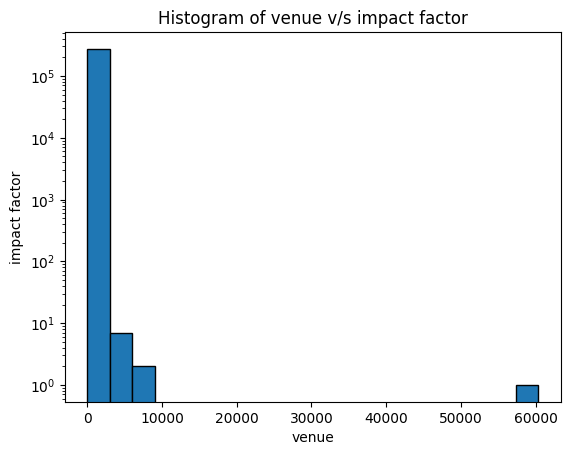

In [17]:
impact_factor_values = venue_impact_factor.values()
plt.hist(impact_factor_values, bins=20, edgecolor='black')
# Customize the plot
plt.yscale('log')

plt.xlabel('venue')
plt.ylabel('impact factor')
plt.title('Histogram of venue v/s impact factor')

plt.show()

In [18]:
largest_impact_factor = -1
venue_with_largest_impact = ""
for key in venue_impact_factor.keys():
  impact_factor = venue_impact_factor.get(key)
  if impact_factor > largest_impact_factor:
    largest_impact_factor = impact_factor
    venue_with_largest_impact = key

print("Venue with largest impact factor: ", venue_with_largest_impact, ", value: ", largest_impact_factor)

Venue with largest impact factor:  Graz , value:  60315.0


Based on the line provided in the question, most journals have impact factor of <= 10. However, the highest apperant impact factor in this case is 60315 which seems to be very far from the general range of values. This puts the value in doubt and makes it seem incorrect.

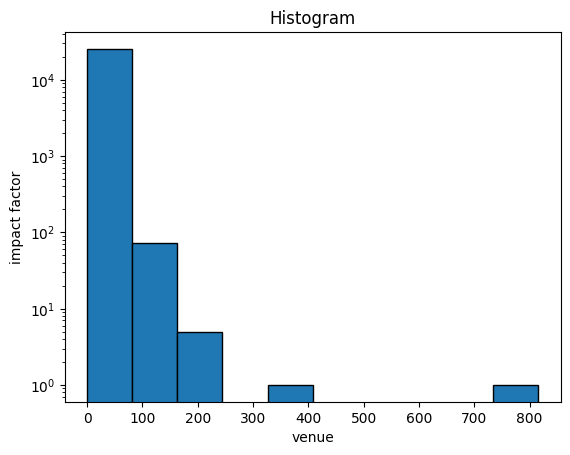

In [19]:
venue_impact_factor_lim10 = dict()
for key in venue_citation_map.keys():
  num_citations = int(venue_citation_map.get(key))
  num_pub = len(venue_pub_map.get(key))
  if num_pub >= 10:
    impact_factor = num_citations/num_pub
    venue_impact_factor_lim10[key] = impact_factor

impact_factor_values = venue_impact_factor_lim10.values()
plt.hist(impact_factor_values, edgecolor='black')
# Customize the plot
plt.yscale('log')

plt.xlabel('venue')
plt.ylabel('impact factor')
plt.title('Histogram')

plt.show()

After restricting the data to have venues with at least 10 publications, we see a shrinkage of x-axis values. This means that the dataset had a significant number of venues with number of journals less that 10. The overall trend, however, looks similar.

In [20]:
print("Total number of citations at venue with largest impact factor: ", venue_citation_map.get(venue_with_largest_impact))

Total number of citations at venue with largest impact factor:  60315


In [21]:
publication_from_venue_with_highest_impact = venue_pub_map.get(venue_with_largest_impact)

for pub in publication_from_venue_with_highest_impact:
    print("Citation count: ", pub_citation_map.get(pub))

Citation count:  60315


In [22]:
venue_citations_map = {}
for venue in venue_pub_map:
    venue_citations_map[venue] = []
    for pub in venue_pub_map.get(venue):
        pub_citations = pub_citation_map.get(pub)
        if pub_citations:
            venue_citations_map[venue].append(pub_citations)
    citation_median_for_venue = np.median(venue_citations_map[venue])
    # print("Impact factor/ mean citations: ", venue_impact_factor.get(venue)/citation_median_for_venue)

/Users/dhruvdhar/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/dhruvdhar/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Seems like the impact factor for a venue is close to the median number of citations for a venue but not always the same.

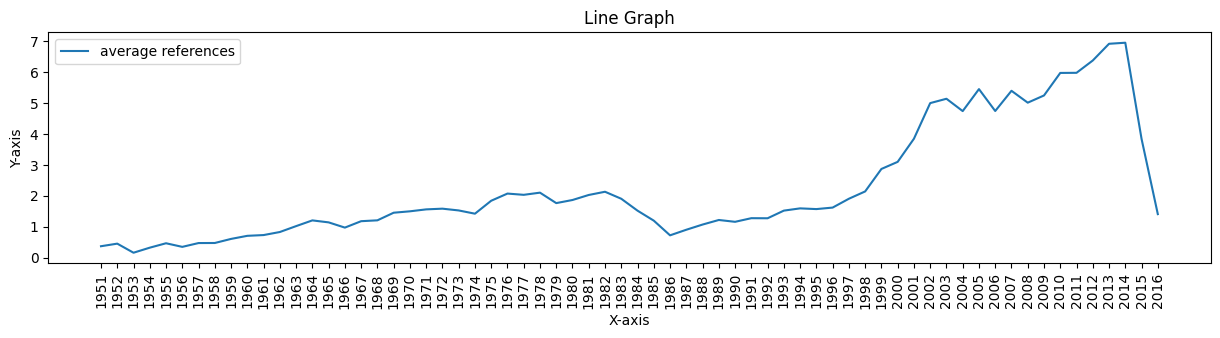

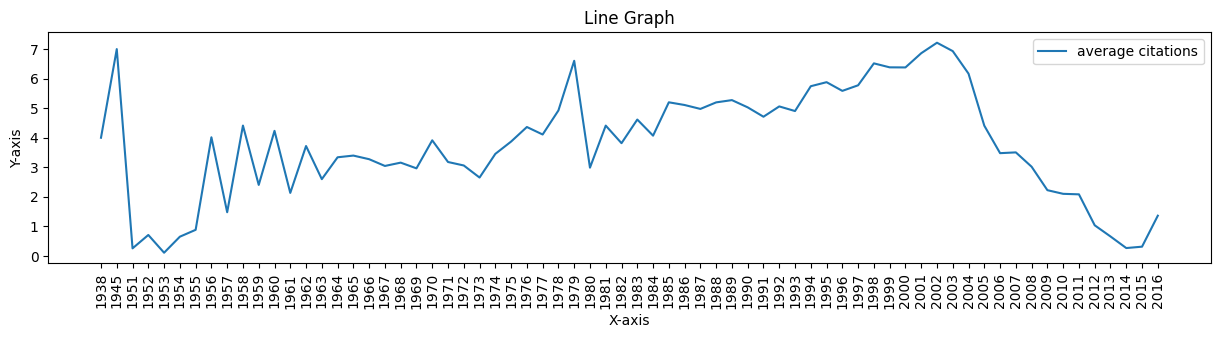

In [23]:
year_avg_ref_per_publication = dict()
year_avg_citation_per_publication = dict()

for key in year_pub_map:
  num_pub_per_year = len(year_pub_map.get(key))
  num_ref_per_year = year_refs_map.get(key)
  num_citation_per_year = year_citation_map.get(key)

  if num_pub_per_year and num_ref_per_year:
    year_avg_ref_per_publication[key] = num_ref_per_year/num_pub_per_year
    
  if num_pub_per_year and num_citation_per_year:
    year_avg_citation_per_publication[key] = num_citation_per_year/num_pub_per_year


x1_values = list(year_avg_ref_per_publication.keys())
x1_values.sort()
y1_values = [year_avg_ref_per_publication.get(i) for i in x1_values]

x2_values = list(year_avg_citation_per_publication.keys())
x2_values.sort()
y2_values = [year_avg_citation_per_publication.get(i) for i in x2_values]

plt.figure(figsize=(15,3))
plt.plot(x1_values, y1_values, label="average references")

plt.xticks(rotation=90)  # Rotate x-axis tick labels by 45 degrees

plt.title("Line Graph")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()

plt.figure(figsize=(15,3))
plt.plot(x2_values, y2_values, label="average citations")
plt.xticks(rotation=90)  # Rotate x-axis tick labels by 45 degrees

plt.title("Line Graph")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()